In [344]:
import numpy as np
import cairo
import math
import matplotlib.pyplot as plt
from scipy import ndimage
import cv2

In [345]:
def generate_filter(start_angle=0):
    elips = []
    for i in range(0, 8):
        w = 32
        img=np.zeros((w,w))
        radius=14
        axes = (radius,radius)
        angle = 0
        startAngle = start_angle
        endAngle = start_angle + 180
        center = (16,16)
        color = 255
        elip = cv2.ellipse(img, center, axes, angle, startAngle, endAngle, color, thickness=-1)
        elips.append(elip)
        start_angle += 45
    return np.array(elips)

In [346]:
def negative_threshold(img):
    return np.where(img == 255, -1, 0)

def positive_threshold(img):
    return np.where(img == 255, 1, 0)

In [347]:
elips_plus = generate_filter(0)
elips_minus = generate_filter(180)
combined = np.logical_or(elips_plus, elips_minus)
elips_negative = negative_threshold(elips_minus)
elips_positive = positive_threshold(elips_plus)
orientation_selectivity_filters = elips_negative + elips_positive
print(np.unique(orientation_selectivity_filters[1]))

[-1  0  1]


<Figure size 432x288 with 0 Axes>

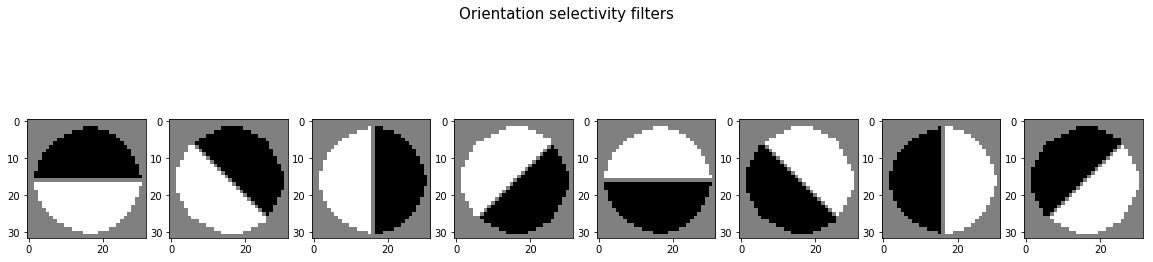

In [365]:
plt.figure()

# plt.title('plus and minus')
# plt.imshow(orientation_selectivity_filters[1], cmap='gray')
# plt.show()
fig, axes = plt.subplots(nrows=1, ncols=8, figsize=(20, 5))
plt.gray()
fig.suptitle('Orientation selectivity filters', fontsize=15)
for col in range(0, 8):
    cell = axes[col]
    cell.imshow(orientation_selectivity_filters[col])

In [340]:
print(orientation_selectivity_filters.shape)
orientation_selectivity_filters = np.einsum('hij->ijh', orientation_selectivity_filters)
print(orientation_selectivity_filters.shape)

(8, 32, 32)
(32, 32, 8)


In [366]:
np.save('orientation_selectivity_filters.npy', orientation_selectivity_filters)